## Predicting a Heart Disease using AI

### In this Notebook we will try find out whether it is possible to built an ai model that can predict if a person has a heart disease or not and how accurate such a model would be

In [30]:
import pandas as pd
import sklearn as sk

In [31]:
df = pd.read_csv("heart_disease_prediction.csv")

In [32]:
print(df.head(5))
print(df.shape)

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
0   40   M           ATA        140          289          0     Normal    172  \
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
(918, 12)


In [33]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Inital Observations
We can see that in this Dataset the average Age of the patients is roughly 56 Years. We can also see that the feature MaxHR (Heart Rate) has a very low min of just 25.4 which is illogical since a person with such a low heartrate would die. This suggests that the dataframe needs to be cleaned before it can be used for an prediction ai model

In [34]:
import matplotlib.pyplot as plt

In [35]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [37]:
# create a list with all object columns

cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = cat_cols.append(pd.Index(['HeartDisease']))
cat_cols = cat_cols.append(pd.Index(['FastingBS']))

print(cat_cols)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'HeartDisease', 'FastingBS'],
      dtype='object')


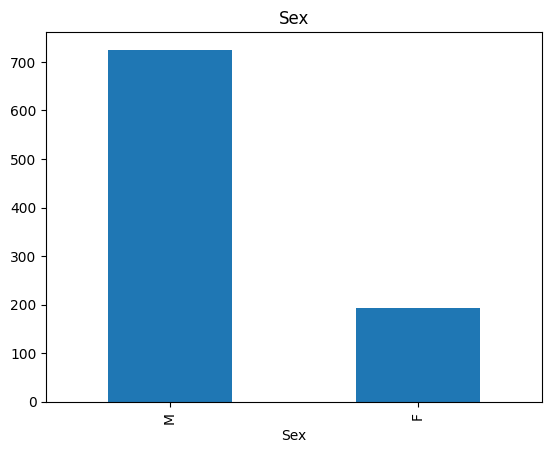

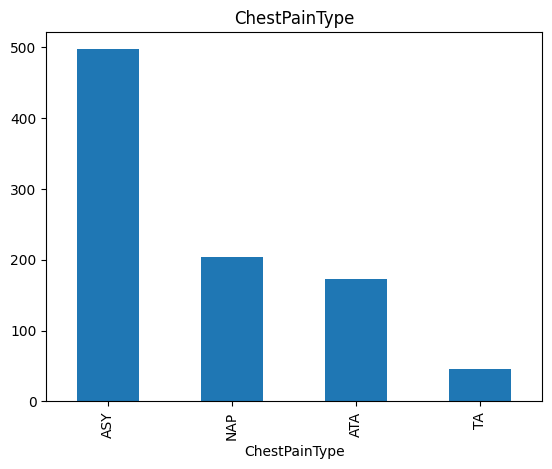

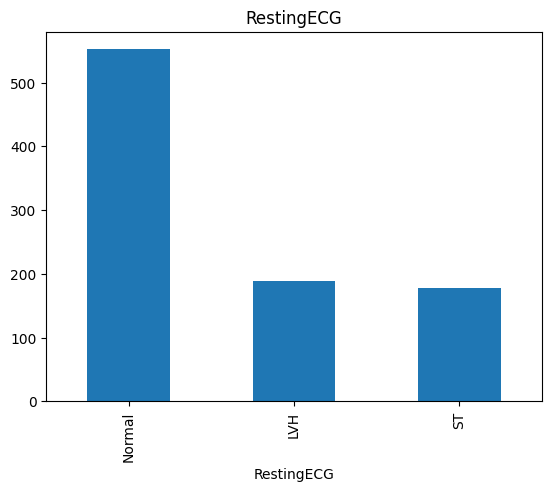

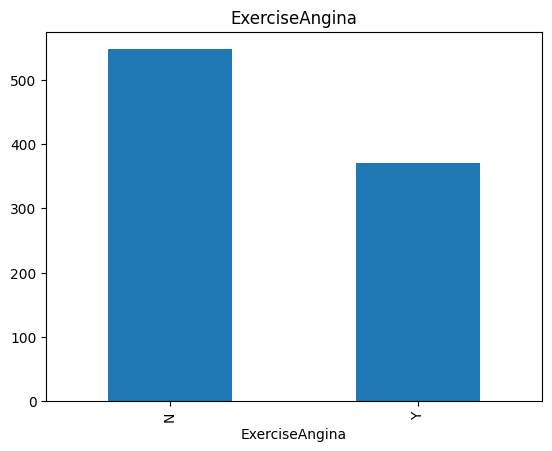

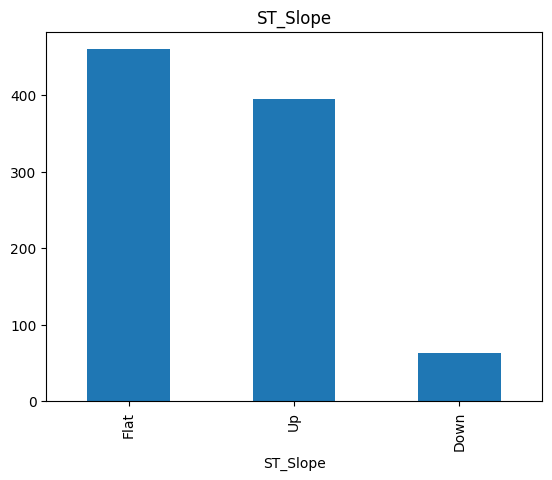

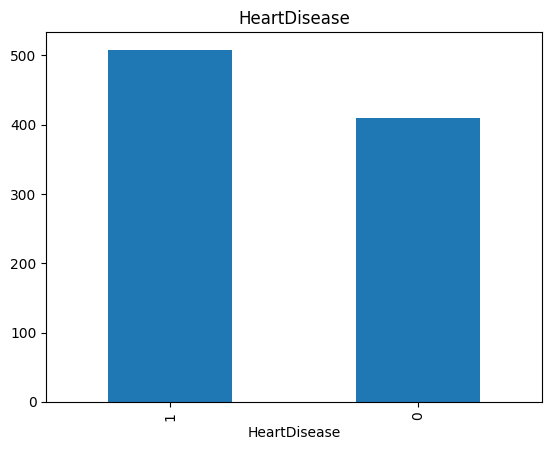

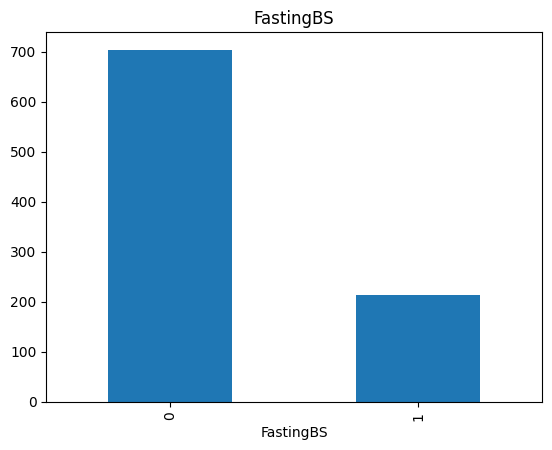

In [38]:
# create a bar chart for each column in cat_cols that shows the frequency of each category

for col in cat_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

Based on the visualized data we can see that there are a lot more males than females in this dataset. we can also see that the most common type of chestpain is ASY (asymptomatic chest pain)

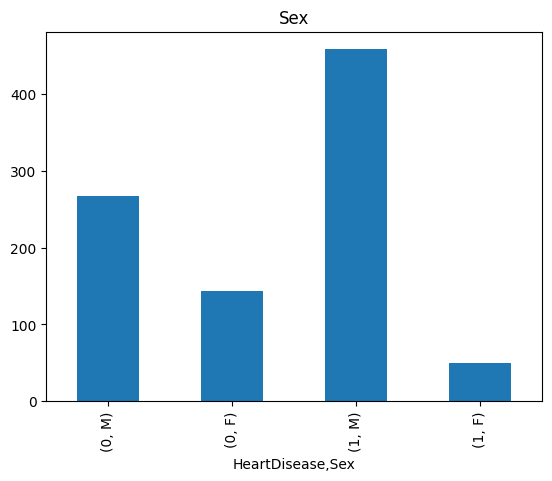

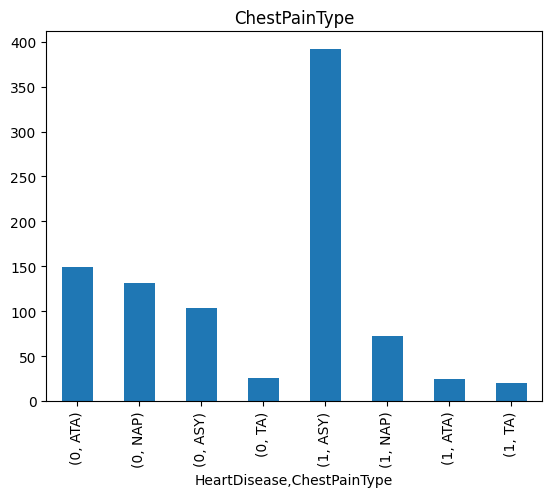

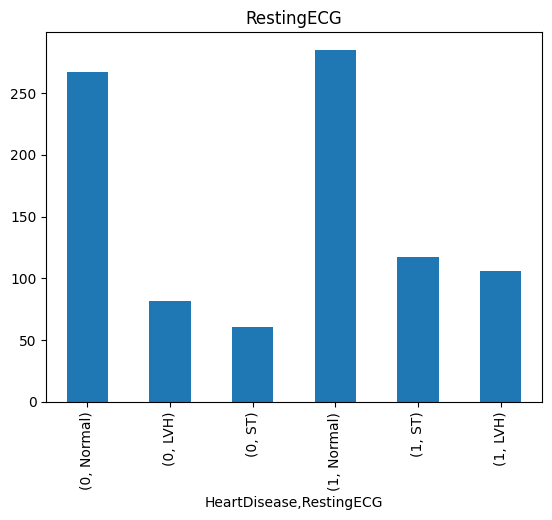

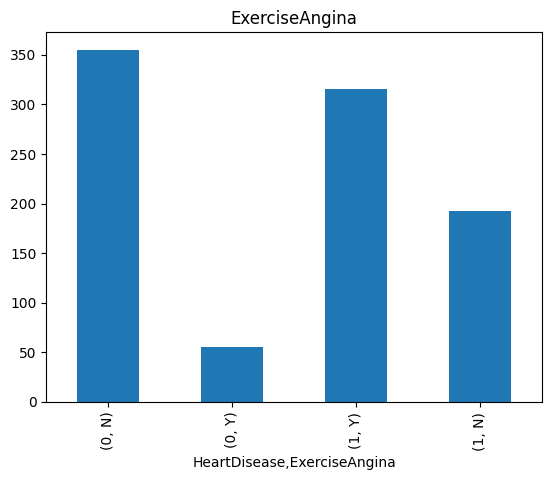

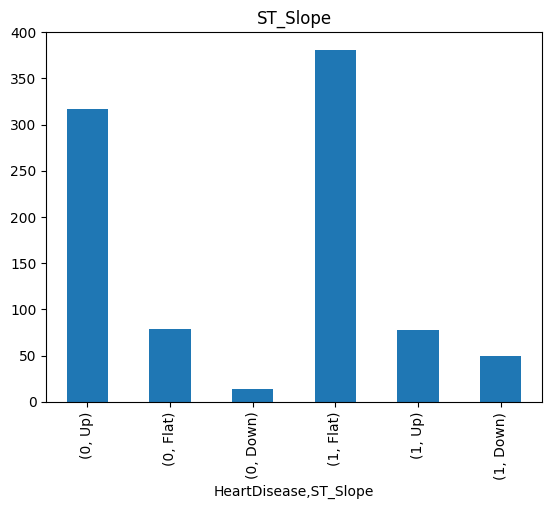

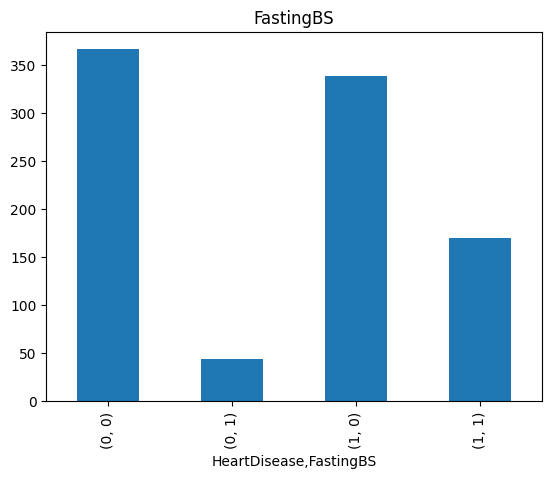

In [39]:
# drop the heart disease column from the cat_cols list
cat_cols = cat_cols.drop('HeartDisease')
# create a bar chart for each column in cat_cols that shows the frequency of each category grouped by HeartDisease

for col in cat_cols:
    df.groupby('HeartDisease')[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

Based on the additional graphs we can see that males are far mor likely to have a heart disease. Futhermore we can see that the most common type of chestpain for people with a heart disease is ASY (asymptomatic chest pain)

In [40]:

print(df[df['RestingBP'] == 0].shape[0])
print(df[df['Cholesterol'] == 0].shape[0])


1
172


In [41]:
# drop the row with a 0 value for RestingBP
df = df[df['RestingBP'] != 0]
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG   
0     40   M           ATA        140          289          0     Normal  \
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

Bad pipe message: %s [b'$\x1d\xce|\xa6\xabv\xd6\x83\x7f!\x11\xa7\xc3/\xd1Uj \x86\xa48\xf9\xc6\xe8\x8amE\xe1\x12\xdfo\x91q\xf8\xcb]\xa1 \x1f@h\x8a\x05\xf1]\x92d\x96\x9b\xc5\x00\x08', b'\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00']
Bad pipe message: %s [b'\x1bR\x81\xa6\xa0\xbd>\xc7d\x9a+\x03\x9d\x8eA\x90@\x1b \xba\xda\x0bp\x8c\xdc=;\x89\xebH\xcf%?\x03 \xe6\x04']
Bad pipe message: %s [b'\x06\xc6\xdd3\x16\xf83S\x85\x04+a\xa52>\tZ.\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0', b"(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d"]
Bad pipe message: %s [b"\xc7\xe1*V'q}\xf0\xd3\xcf\x9bhfx\x92\xda\xc6\xf3\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2